In [33]:
import os
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [35]:
#to read points from txt files
def readTXTpoints(filepath):
    filepath = os.getcwd() + filepath
    f = open(filepath,'r')
    temp=[]
    for i in f.readlines():
        x,y=[float(t) for t in i.split()]
        temp.append([x,y])
    X=np.array(temp)
    return X # array of all points

#to make y as K dimensional classfication output (k = number of classes, here 3)
def clas(y):
    y = np.fromiter(map(int, y), dtype = np.int)
    y_temp = []
    for i in range(len(y)):
        temp = [0,0,0] #3 classes
        temp[y[i]] = 1
        y_temp.append(temp)
    return np.array(y_temp)

#to seperate X and y features
def xy(data):
    X=[]
    y=[]
    for i,j in enumerate(data):
        for c in j:
            y.append(i)
            X.append(c)
    return np.array(X),clas(np.array(y)) #X and y features

#to read points from csv files and get X and y features
def readCSVpoints(filepath):
    filepath = os.getcwd() + filepath
    df = pd.read_csv(filepath)
    mylist = df.to_numpy()
    X=[]
    y=[]
    for i in range(len(mylist)):
        X.append(mylist[i][:-1])
        y.append(mylist[i][-1])    
    return [X,y] # X and y features

def TrainValidateTestSplit(x, Y):
    """
    Splits into TrainData, ValidateData, TestData
    Output: 6 arrays i.e. X_train, X_validate, X_test, y_train, y_validate, y_test
    """
    class_points = len(Y)//3 #points per class
    index = 0
    X_train, X_validate, X_test, y_train, y_validate, y_test = [],[],[],[],[],[]
    for i in range(3):
        X = x[index:index+class_points]
        y = Y[index:index+class_points]
        index = index+class_points
        # randomly shuffled data in each class
        temp = list(zip(X, y))  
        random.shuffle(temp)
        X, y = zip(*temp)
        #split train-validate-test data as 60:20:20
        X_train += X[0:int(.6*len(X))]
        X_validate += X[int(.6*len(X)):int(.8*len(X))]
        X_test += X[int(.8*len(X)):int(len(X))]
        y_train += y[0:int(.6*len(y))]
        y_validate += y[int(.6*len(y)):int(.8*len(y))]
        y_test += y[int(.8*len(y)):int(len(y))]   
    return np.array(X_train), np.array(X_validate), np.array(X_test), np.array(y_train), np.array(y_validate), np.array(y_test)

def TrainValidateSplit(x, Y):
    """
    Splits into TrainData, ValidateData
    Output: 4 arrays i.e. X_train, X_validate, y_train, y_validate
    """
    Y = clas(Y)
    class_points = len(Y)//3 #points per class
    #print(class_points)
    index = 0
    X_train, X_validate, y_train, y_validate = [],[],[],[]

    for i in range(3):
        X = x[index:index+class_points]
        y = Y[index:index+class_points]
        index = index+class_points
        # randomly shuffled data in each class
        temp = list(zip(X, y))  
        random.shuffle(temp)
        X, y = zip(*temp)
        #split train-validate image data as 40:10 i.e. 80:20
        X_train += X[0:int(.8*len(X))]
        X_validate += X[int(.8*len(X)):int(len(X))]
        y_train += y[0:int(.8*len(y))]
        y_validate += y[int(.8*len(y)):int(len(y))]
    return np.array(X_train), np.array(X_validate), np.array(y_train), np.array(y_validate)

In [37]:
# Load All Data
# Code to generate TrainData, ValidateData, TestData in comments under their respective dataset

ls_c1 = readTXTpoints("/Group20/Classification/LS_Group20/Class1.txt")
ls_c2 = readTXTpoints("/Group20/Classification/LS_Group20/Class2.txt")
ls_c3 = readTXTpoints("/Group20/Classification/LS_Group20/Class3.txt")
ls_data = [ls_c1, ls_c2, ls_c3]
# X_train, X_validate, X_test, y_train, y_validate, y_test = TrainValidateTestSplit(xy(ls_data)[0],xy(ls_data)[1])

nls = readTXTpoints("/Group20/Classification/NLS_Group20.txt")
nls_data = [nls[i:i + 500] for i in range(0, len(nls), 500)]
# X_train, X_validate, X_test, y_train, y_validate, y_test = TrainValidateTestSplit(xy(nls_data)[0],xy(nls_data)[1])

img_data_train = readCSVpoints("/Group20/Classification/Image_Group20/trainBOVW.csv")
img_data_test = readCSVpoints("/Group20/Classification/Image_Group20/testBOVW.csv")
# [X_train, X_validate, y_train, y_validate],  X_test, y_test = TrainValidateSplit(img_data_train[0], img_data_train[1]), img_data_test[0], clas(img_data_test[1])

uni_data = readCSVpoints("/Group20/Regression/UnivariateData/20.csv")
# X_train, X_validate, X_test, y_train, y_validate, y_test = TrainValidateTestSplit(uni_data[0],[[uni_data[1][i]] for i in range(len(uni_data[1]))])

bi_data = readCSVpoints("/Group20/Regression/BivariateData/20.csv")
# X_train, X_validate, X_test, y_train, y_validate, y_test = TrainValidateTestSplit(bi_data[0],[[bi_data[1][i]] for i in range(len(bi_data[1]))])

In [47]:
#Code for MLFFNN

#Initializing a network(n_input, n_hidden1, n_hidden2, n_outputs)
def initialize_network(n_inputs, n_hidden1, n_hidden2, n_outputs):
	"""
    Atmost 2 hidden layers. If only one hidden layer then, n_hidden2 =0
    Returns network architecture w.r.t weight matrix for each layer
    """
	network = list()
	hidden_layer1 = [{'weights':[random.random() for i in range(n_inputs + 1)]} for j in range(n_hidden1)]
	network.append(hidden_layer1)
	if(n_hidden2 != 0):
		hidden_layer2 = [{'weights':[random.random() for i in range(n_hidden1 + 1)]} for j in range(n_hidden2)]
		network.append(hidden_layer2)
		output_layer = [{'weights':[random.random() for i in range(n_hidden2 + 1)]} for j in range(n_outputs)]
		network.append(output_layer)
	else:
		output_layer = [{'weights':[random.random() for i in range(n_hidden1 + 1)]} for j in range(n_outputs)]
		network.append(output_layer)    
	#print(network)
	return network

#Calculate activation of a neuron w/o activation function
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

#Calculate actiavtion of a neuron w.r.t activation function
def transfer(activation, activation_function):
	if (activation_function == "sigmoidal"):
		return 1.0 / (1.0 + math.exp(-activation)) # assumed Beta = 1 (for simplicity)
	elif (activation_function == "linear"):
		return activation

# Forward propagate to a layer's output
def forward_propagate(network, row, activation_function):
	inputs = row #one tuple at a time i.e. X_train[i]
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation, activation_function)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	# generating output from last output
	if(activation_function == "sigmoidal"):
		pred = [0]*len(inputs)
		pred[np.argmax(inputs)] = 1
		inputs = pred
	return inputs

# Calculate the derivative of an neuron output
def transfer_derivative(output, activation_function):
	if (activation_function == "sigmoidal"):
		return output * (1.0 - output)
	elif (activation_function == "linear"):
		return 1.0

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected, activation_function):
	for i in reversed(range(len(network))):
		#print(network)
		layer = network[i]
		errors = list()
		if i != len(network)-1: # i not equal to the output layer
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'], activation_function)
	return

# Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row #one tuple at a time i.e. y_train[i]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] += l_rate * neuron['delta']
	return

# Train a network for a fixed number of epochs
def train_network(network, X_train, y_train, l_rate, n_epoch, activation_function):
	avg_error = 0.0
	for epoch in range(n_epoch):
		for i in range(len(y_train)):
			outputs = forward_propagate(network, X_train[i], activation_function)
			expected = y_train[i]
			avg_error += 0.5*(outputs-expected)*(outputs-expected)
			backward_propagate_error(network, expected, activation_function)
			update_weights(network, y_train[i], l_rate)
	return avg_error/len(y_train)

# Make a prediction with a network
def predict(network, row, activation_function):
	outputs = forward_propagate(network, row, activation_function)
	return outputs

def regression_predict_dataset(network, X, y, activation_function):
	predicted = [predict(network, row, activation_function) for row in X]
	return mean_squared_error(y, predicted), predicted

# Calculate accuracy percentage
def classification_accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if np.array_equal(np.array(actual[i]), np.array(predicted[i])):
			correct += 1
	return correct / float(len(actual)) * 100.0
 
# holdout method for model validation while training
def validate_network(network, X_validate, y_validate, activation_function):
	predicted = []
	for i in range(len(y_validate)):
		predicted.append(predict(network, X_validate[i], activation_function))
	if activation_function == "sigmoidal":
		return classification_accuracy_metric(y_validate, predicted), predicted
	elif activation_function == "linear":
		return -1.0*mean_squared_error(y_validate, predicted), predicted

def grid_search(X_train, y_train, X_validate, y_validate, l_rate, n_epochs_all, n_inputs, n_hidden1_all, n_hidden2_all, n_outputs, activation_function, plot=False):
	model_avg_error = []
	model_accuracy = []
	model_complexity = []
	for n_epochs in n_epochs_all:
		for n_hidden2 in n_hidden2_all:
			for n_hidden1 in n_hidden1_all:
				network = initialize_network(n_inputs, n_hidden1, n_hidden2, n_outputs)
				model_avg_error.append(train_network(network, X_train, y_train, l_rate, n_epochs, activation_function))
				model_accuracy.append(validate_network(network, X_validate, y_validate, activation_function)[0])
				#print(y_validate)
				#print(validate_network(network, X_validate, y_validate, activation_function)[1])
				model_complexity.append([n_inputs, n_hidden1, n_hidden2, n_outputs, n_epochs])
	if(plot == True):
		plt.title("Epochs vs Average error")
		plt.xlabel("Epochs")
		plt.ylabel("Average Error")
		plt.scatter(n_epochs_all, model_avg_error)
		plt.plot(n_epochs_all, model_avg_error)
		plt.show()
	model_accuracy, model_complexity = zip(*sorted(zip(model_accuracy,model_complexity), reverse=True))
	return model_complexity, model_accuracy


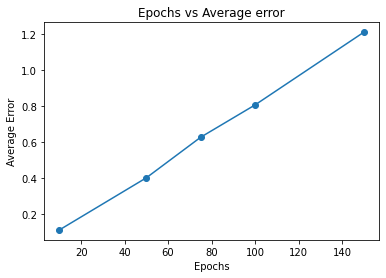

Best MSE for this model for is:  0.015833560313118274  for epochs value =  10 



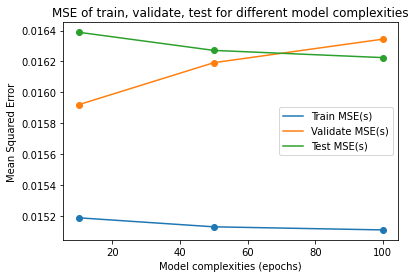

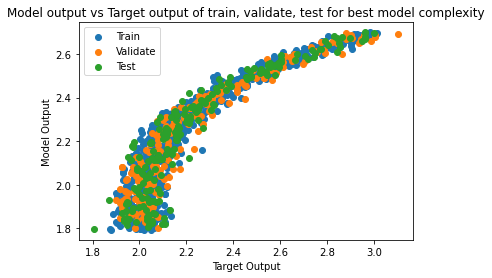

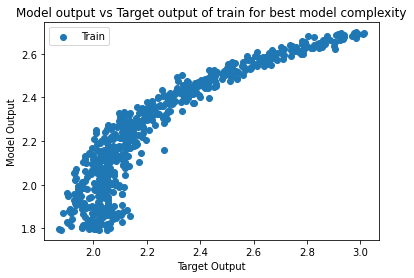

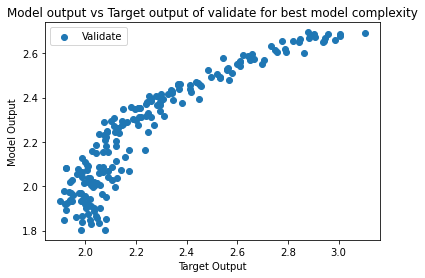

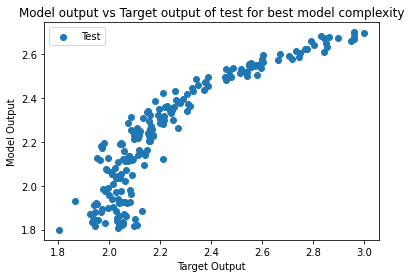

In [49]:
# For uni-variate dataset
X_train, X_validate, X_test, y_train, y_validate, y_test = TrainValidateTestSplit(uni_data[0],[[uni_data[1][i]] for i in range(len(uni_data[1]))])
l_rate = 0.01
n_epochs_all = [10,50,75,100,150]
n_inputs = 1
n_hidden1_all = [4]
n_hidden2_all = [2]
n_outputs = 1
activation_function = "linear"

best_hyperparameters, best_accuracy = grid_search(X_train, y_train, X_validate, y_validate, l_rate, n_epochs_all, n_inputs, n_hidden1_all, n_hidden2_all, n_outputs, activation_function, plot = True)
best_MSE =[[],[],[]]
predicted_train, predicted_validate, predicted = np.array([]),np.array([]),np.array([])

for i in reversed(range(len(best_hyperparameters[:3]))):
    network = initialize_network(n_inputs, n_hidden1_all[0], n_hidden2_all[0], n_outputs)
    train_network(network, X_train, y_train, l_rate, best_hyperparameters[i][-1], activation_function)

    MSE_train, predicted_train = regression_predict_dataset(network, X_train, y_train, activation_function)
    MSE_validate, predicted_validate = regression_predict_dataset(network, X_validate, y_validate, activation_function)
    MSE_test, predicted = regression_predict_dataset(network, X_test, y_test, activation_function)
    best_MSE[0].append(MSE_train)
    best_MSE[1].append(MSE_validate)
    best_MSE[2].append(MSE_test)

best_hyperparameters = [best_hyperparameters[i][-1] for i in range(3)]
print("Best MSE for this model for is: ", -1.0*best_accuracy[0], " for epochs value = ", best_hyperparameters[i], "\n")
best_hyperparameters, best_MSE = zip(*sorted(zip(best_hyperparameters, best_MSE)))
plt.title("MSE of train, validate, test for different model complexities")
plt.xlabel("Model complexities (epochs)")
plt.ylabel("Mean Squared Error")
plt.scatter(best_hyperparameters, best_MSE[0][::-1])
plt.plot(best_hyperparameters, best_MSE[0][::-1],  label = "Train MSE(s)") #train MSE(s) for different model complexities
plt.scatter(best_hyperparameters, best_MSE[1][::-1])
plt.plot(best_hyperparameters, best_MSE[1][::-1], label = "Validate MSE(s)") #validate MSE(s) for different model complexities
plt.scatter(best_hyperparameters, best_MSE[2][::-1])
plt.plot(best_hyperparameters, best_MSE[2][::-1], label = "Test MSE(s)") #test MSE(s) for different model complexities
plt.legend()
plt.show()


plt.title("Model output vs Target output of train, validate, test for best model complexity")
plt.xlabel("Target Output")
plt.ylabel("Model Output")
plt.scatter(y_train, predicted_train, label = "Train")
plt.scatter(y_validate, predicted_validate, label = "Validate")
plt.scatter(y_test, predicted, label = "Test")
plt.legend()
plt.show()

#Individual plots for train, validate, test

plt.title("Model output vs Target output of train for best model complexity")
plt.xlabel("Target Output")
plt.ylabel("Model Output")
plt.scatter(y_train, predicted_train, label = "Train")
plt.legend()
plt.show()

plt.title("Model output vs Target output of validate for best model complexity")
plt.xlabel("Target Output")
plt.ylabel("Model Output")
plt.scatter(y_validate, predicted_validate, label = "Validate")
plt.legend()
plt.show()

plt.title("Model output vs Target output of test for best model complexity")
plt.xlabel("Target Output")
plt.ylabel("Model Output")
plt.scatter(y_test, predicted, label = "Test")
plt.legend()
plt.show()

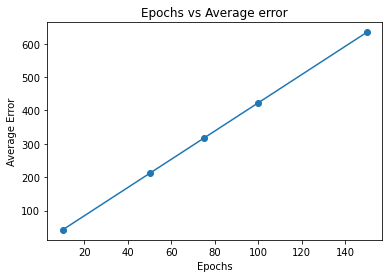

Best MSE for this model for is:  8.38098758447484  for epochs value =  10 



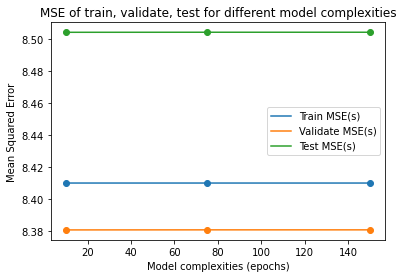

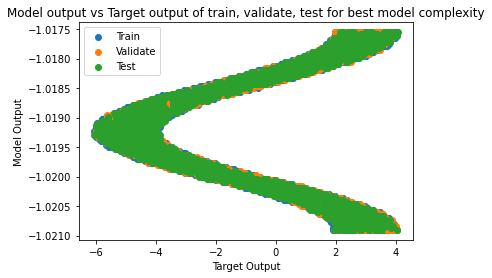

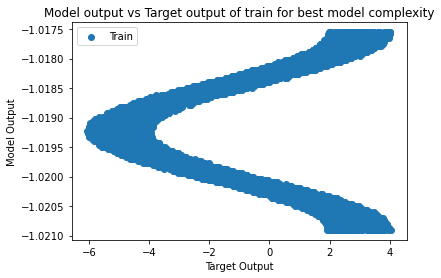

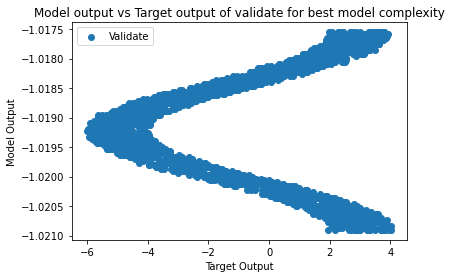

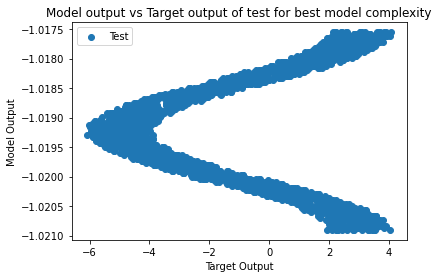

In [50]:
# For bi-variate dataset
X_train, X_validate, X_test, y_train, y_validate, y_test = TrainValidateTestSplit(bi_data[0],[[bi_data[1][i]] for i in range(len(bi_data[1]))])
l_rate = 0.01
n_epochs_all = [10,50,75,100,150]
n_inputs = 1
n_hidden1_all = [4]
n_hidden2_all = [2]
n_outputs = 1
activation_function = "linear"

best_hyperparameters, best_accuracy = grid_search(X_train, y_train, X_validate, y_validate, l_rate, n_epochs_all, n_inputs, n_hidden1_all, n_hidden2_all, n_outputs, activation_function, plot = True)
best_MSE =[[],[],[]]
predicted_train, predicted_validate, predicted = np.array([]),np.array([]),np.array([])

for i in reversed(range(len(best_hyperparameters[:3]))):
    network = initialize_network(n_inputs, n_hidden1_all[0], n_hidden2_all[0], n_outputs)
    train_network(network, X_train, y_train, l_rate, best_hyperparameters[i][-1], activation_function)

    MSE_train, predicted_train = regression_predict_dataset(network, X_train, y_train, activation_function)
    MSE_validate, predicted_validate = regression_predict_dataset(network, X_validate, y_validate, activation_function)
    MSE_test, predicted = regression_predict_dataset(network, X_test, y_test, activation_function)
    best_MSE[0].append(MSE_train)
    best_MSE[1].append(MSE_validate)
    best_MSE[2].append(MSE_test)

best_hyperparameters = [best_hyperparameters[i][-1] for i in range(3)]
print("Best MSE for this model for is: ", -1.0*best_accuracy[0], " for epochs value = ", best_hyperparameters[i], "\n")
best_hyperparameters, best_MSE = zip(*sorted(zip(best_hyperparameters, best_MSE)))
plt.title("MSE of train, validate, test for different model complexities")
plt.xlabel("Model complexities (epochs)")
plt.ylabel("Mean Squared Error")
plt.scatter(best_hyperparameters, best_MSE[0][::-1])
plt.plot(best_hyperparameters, best_MSE[0][::-1],  label = "Train MSE(s)") #train MSE(s) for different model complexities
plt.scatter(best_hyperparameters, best_MSE[1][::-1])
plt.plot(best_hyperparameters, best_MSE[1][::-1], label = "Validate MSE(s)") #validate MSE(s) for different model complexities
plt.scatter(best_hyperparameters, best_MSE[2][::-1])
plt.plot(best_hyperparameters, best_MSE[2][::-1], label = "Test MSE(s)") #test MSE(s) for different model complexities
plt.legend()
plt.show()


plt.title("Model output vs Target output of train, validate, test for best model complexity")
plt.xlabel("Target Output")
plt.ylabel("Model Output")
plt.scatter(y_train, predicted_train, label = "Train")
plt.scatter(y_validate, predicted_validate, label = "Validate")
plt.scatter(y_test, predicted, label = "Test")
plt.legend()
plt.show()

#Individual plots for train, validate, test

plt.title("Model output vs Target output of train for best model complexity")
plt.xlabel("Target Output")
plt.ylabel("Model Output")
plt.scatter(y_train, predicted_train, label = "Train")
plt.legend()
plt.show()

plt.title("Model output vs Target output of validate for best model complexity")
plt.xlabel("Target Output")
plt.ylabel("Model Output")
plt.scatter(y_validate, predicted_validate, label = "Validate")
plt.legend()
plt.show()

plt.title("Model output vs Target output of test for best model complexity")
plt.xlabel("Target Output")
plt.ylabel("Model Output")
plt.scatter(y_test, predicted, label = "Test")
plt.legend()
plt.show()